In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn 
import seaborn as sns 
import folium
import random

from sklearn.linear_model import LinearRegression

**Analyzing Maryland Crashes from 2015 to 2020**
**by Pranav Pappala**

The start of this data analysis starts with a personal observation. 

Maryland is notorious for bad drivers and bad driving. Personal story, my parents' car insurance used to be 300 dollars with me, 
and that was a really good deal due to their safe driving habits and good credit. The moment we moved to Maryland, that 
number close to tripled and reached roughly 1000 dollars. I learned that the main reason why that figure shot up was because 
Maryland drivers got into a lot of crashes, so to compensate, the premiums from the insurance companies went up quite a 
bit.

So, I was motivated to understand what factors can predict a crash with Maryland vehicles, so I looked at the official Maryland open data websites funded by the state government.

Here are the libraries that were used as well as references to them for future data science use
1. Numpy -> used for certain mathematical functions that make predictions easier
2. Pandas -> used to place data from files and place them in dataframes
3. Matplotlib -> used to help plot data in a 2D figure for simple analysis
4. Scikit-learn -> used to help create predictive model for crash severity 
5. Seaborn -> used to help plot and highlight correlations in data
6. Folium -> used to help map Maryland as well as the crashes that occurred 

The first dataset is a CSV file of Maryland statewide vehicle crashes garnered from official crash 
reports which was retrieved from this website: 
https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes/65du-s3qu

The second dataset is a CSV file of vehicle details garnered from the exact same set of official crash reports which
was retrieved from this website: 
https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes-Vehicle-Details/mhft-5t5y

With that personal story in mind, I wanted to focus on some of the aspects behind the severity of a crash in Maryland. Do some crashes happen more in certain areas of Maryland than others? Do some features (like road conditions or daylight conditions) suggest a crash is more likely to happen?

I would also like to determine correlations between damage and movement descriptions to see if there is a certain type
of movement that causes worse crashes than others. I want to create a correlation matrix for the vehicle type in the crash
to find out if correlations exist between items such as the model and severity using seaborn, or vehicle year and damage.

To end this all, could one predict the damage done to a vehicle in a crash using only a select few features with decent correlation?

**Importing and Cleaning the Data**

In [3]:
# Opening the first data set of crashes into a Pandas DataFrame
crash_data = pd.read_csv("Maryland_Statewide_Vehicle_Crashes.csv")
crash_data

C:\Users\prana\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (34,46) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,YEAR,QUARTER,LIGHT_DESC,LIGHT_CODE,COUNTY_DESC,COUNTY_NO,MUNI_DESC,MUNI_CODE,JUNCTION_DESC,JUNCTION_CODE,...,FEET_MILES_FLAG_DESC,FEET_MILES_FLAG,DISTANCE_DIR_FLAG,REFERENCE_NO,REFERENCE_TYPE_CODE,REFERENCE_SUFFIX,REFERENCE_ROAD_NAME,LATITUDE,LONGITUDE,LOCATION
0,2020,Q2,Daylight,1.00,Baltimore,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.277263,-76.503693,POINT (-76.5036932 39.27726285)
1,2020,Q2,NaN,6.02,Baltimore City,24.0,NaN,NaN,Non Intersection,1.0,...,Miles,M,N,NaN,NaN,NaN,NORTH AVE,39.311025,-76.616429,POINT (-76.616429453205 39.311024794431)
2,2020,Q2,Daylight,1.00,Montgomery,15.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.140680,-77.193413,POINT (-77.193412729561 39.140680249069)
3,2017,Q2,Daylight,1.00,Baltimore City,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.282928,-76.635215,POINT (-76.6352150952347 39.2829284750108)
4,2020,Q2,Daylight,1.00,Cecil,7.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.611028,-75.951314,POINT (-75.951314 39.611027833333)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665550,2020,Q4,Daylight,1.00,Baltimore,3.0,NaN,0.0,Not Applicable,0.0,...,Miles,M,S,3894.0,CO,NaN,BONAPARTE AVE,39.460693,-76.461324,POINT (-76.461323922387 39.460692638945)
665551,2020,Q4,Daylight,1.00,Charles,8.0,NaN,0.0,Intersection,2.0,...,Feet,F,S,718.0,CO,NaN,KINTORE RD,38.602733,-76.904887,POINT (-76.904887258434 38.602733130083)
665552,2020,Q4,Dark No Lights,4.00,Anne Arundel,2.0,NaN,3.0,Non Intersection,1.0,...,Feet,F,S,2470.0,MU,NaN,POPLAR AVE,38.982176,-76.519349,POINT (-76.519349371604 38.982176061212)
665553,2020,Q4,Daylight,1.00,Montgomery,15.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.075324,-77.137168,POINT (-77.13716803374 39.075323507136)


In [4]:
# Opening the second dataset of crashes (but centered on vehicle details) into a second Pandas DataFrame
car_data = pd.read_csv("Maryland_Statewide_Vehicle_Crashes_-_Vehicle_Details.csv")
car_data

,HARM_EVENT_DESC,HARM_EVENT_CODE,CONTI_DIRECTION_DESC,CONTI_DIRECTION_CODE,DAMAGE_DESC,DAMAGE_CODE,MOVEMENT_DESC,MOVEMENT_CODE,VIN_NO,REPORT_NO,...,TOWED_VEHICLE_CONFIG_DESC,TOWED_VEHICLE_CONFIG_CODE,AREA_DAMAGED_CODE_IMP1,AREA_DAMAGED_CODE1,AREA_DAMAGED_CODE2,AREA_DAMAGED_CODE3,AREA_DAMAGED_CODE_MAIN_DESC,AREA_DAMAGED_CODE_MAIN,YEAR,Quarter
0,Other Vehicle,1.0,North,N,Unknown,99,Unknown,99.0,NaN,AE5057004X,...,Unknown,99,11.0,10.0,11.0,12.0,Eleven o'clock,11.0,2020,Q2
1,Other Vehicle,1.0,North,N,Superficial,2,Moving Constant Speed,1.0,NMTKHMBX0JR025092,MSP7221001P,...,Not Applicable,0,12.0,6.0,12.0,NaN,Twelve o'clock,12.0,2020,Q2
2,Other Vehicle,1.0,South,S,Functional,3,Stopped in Traffic Lane,6.0,2GNAXPEX5K6103012,DA37010040,...,Not Applicable,0,6.0,6.0,NaN,NaN,Six o'clock,6.0,2020,Q2
3,Fixed Object,9.0,Unknown,U,Unknown,99,Not Applicable,0.0,NaN,MDTA1791002C,...,Not Applicable,0,99.0,99.0,NaN,NaN,Unknown,99.0,2020,Q2
4,Other Vehicle,1.0,East,E,Disabling,4,Slowing or Stopping,3.0,5FNRL18672B048550,AE456100BL,...,Not Applicable,0,6.0,6.0,12.0,NaN,Six o'clock,6.0,2020,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242398,Parked Vehicle,2.0,NaN,NaN,Disabling,4,Parked,10.0,2T1BURHE3EC196871,AE60050039,...,Not Applicable,0,11.0,10.0,11.0,NaN,Ten o'clock,10.0,2020,Q4
1242399,Other Vehicle,1.0,East,E,Unknown,99,Making Right Turn,13.0,JTMZD33VX75068582,DE3177005T,...,Not Applicable,0,11.0,11.0,NaN,NaN,Eleven o'clock,11.0,2020,Q4
1242400,Parked Vehicle,2.0,East,E,Superficial,2,Moving Constant Speed,1.0,5J6TF2H53BL006569,ADK421000M,...,Not Applicable,0,1.0,1.0,NaN,NaN,One o'clock,1.0,2020,Q4
1242401,Other Vehicle,1.0,North,N,Disabling,4,Moving Constant Speed,1.0,1FMJU1JT8KEA01129,AC2292002X,...,Not Applicable,0,12.0,1.0,2.0,12.0,Twelve o'clock,12.0,2020,Q4


Now, we have to clean up the data by removing redundant data and data meant more for authorities rather than analysts

There are many columns with qualitative data immediately followed up by columns with the same exact data in the form of 
codes. For police reports and certain database functions, these codes would be more applicable, but not so much for
this case. So, let's remove columns with these codes; the data will still be there in the qualitative data columns.

For the crash data, the flags and data associated with them offer minimal new insight into the crash that cannot be
gleaned from while being redundant points of data; for purposes of making the data cleaner, the columns will be dropped. Municipality is also redundant data for location when there's also data for county which is more palatable and gives information about locality to a very similar level of abstraction, so one can drop that as well. 

For the car data, the redundancies occur from qualitative data to qualitative data, with data such as "FIRE FLAG" and "FIRE FLAG DESC", so we will drop the descriptions and keep the flag numbers for analytical purposes when it comes to finding correlations or building a predictive model.

In [5]:
crash_codes = ['MUNI_DESC', 'MUNI_CODE']
car_codes = ['VIN_NO', 'REPORT_NO', 'VEHICLE_ID', 'AREA_DAMAGED_CODE1', 'AREA_DAMAGED_CODE2', 'AREA_DAMAGED_CODE3']

for each_col in crash_data.columns:
    if (each_col.find("FLAG") != -1):
        crash_codes.append(each_col)

for each_col in car_data.columns:
    if (each_col.find("FLAG_DESC") != -1):
        car_codes.append(each_col)
        
crash_data = crash_data.drop(columns = crash_codes)
print(crash_data)
car_data = car_data.drop(columns = car_codes)
print(car_data)

        YEAR QUARTER      LIGHT_DESC  LIGHT_CODE     COUNTY_DESC  COUNTY_NO  \
0       2020      Q2        Daylight        1.00       Baltimore        3.0   
1       2020      Q2             NaN        6.02  Baltimore City       24.0   
2       2020      Q2        Daylight        1.00      Montgomery       15.0   
3       2017      Q2        Daylight        1.00  Baltimore City       24.0   
4       2020      Q2        Daylight        1.00           Cecil        7.0   
...      ...     ...             ...         ...             ...        ...   
665550  2020      Q4        Daylight        1.00       Baltimore        3.0   
665551  2020      Q4        Daylight        1.00         Charles        8.0   
665552  2020      Q4  Dark No Lights        4.00    Anne Arundel        2.0   
665553  2020      Q4        Daylight        1.00      Montgomery       15.0   
665554  2020      Q4           Other       88.00       Baltimore        3.0   

           JUNCTION_DESC  JUNCTION_CODE      COLLIS

**Plotting the Data**

With the data in hand, we should find how accidents occur across multiple lines of thought such as location, weather conditions

Index(['YEAR', 'QUARTER', 'LIGHT_DESC', 'LIGHT_CODE', 'COUNTY_DESC',
       'COUNTY_NO', 'JUNCTION_DESC', 'JUNCTION_CODE', 'COLLISION_TYPE_DESC',
       'COLLISION_TYPE_CODE', 'SURF_COND_DESC', 'SURF_COND_CODE', 'LANE_DESC',
       'LANE_CODE', 'RD_COND_DESC', 'RD_COND_CODE', 'RD_DIV_DESC',
       'RD_DIV_CODE', 'FIX_OBJ_DESC', 'FIX_OBJ_CODE', 'REPORT_NO',
       'REPORT_TYPE', 'WEATHER_DESC', 'WEATHER_CODE', 'ACC_DATE', 'ACC_TIME',
       'LOC_CODE', 'AGENCY_CODE', 'AREA_CODE', 'HARM_EVENT_DESC1',
       'HARM_EVENT_CODE1', 'HARM_EVENT_DESC2', 'HARM_EVENT_CODE2', 'RTE_NO',
       'ROUTE_TYPE_CODE', 'RTE_SUFFIX', 'LOG_MILE', 'MAINROAD_NAME',
       'DISTANCE', 'REFERENCE_NO', 'REFERENCE_TYPE_CODE', 'REFERENCE_SUFFIX',
       'REFERENCE_ROAD_NAME', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')
Index(['HARM_EVENT_DESC', 'HARM_EVENT_CODE', 'CONTI_DIRECTION_DESC',
       'CONTI_DIRECTION_CODE', 'DAMAGE_DESC', 'DAMAGE_CODE', 'MOVEMENT_DESC',
       'MOVEMENT_CODE', 'CV_BODY_TY

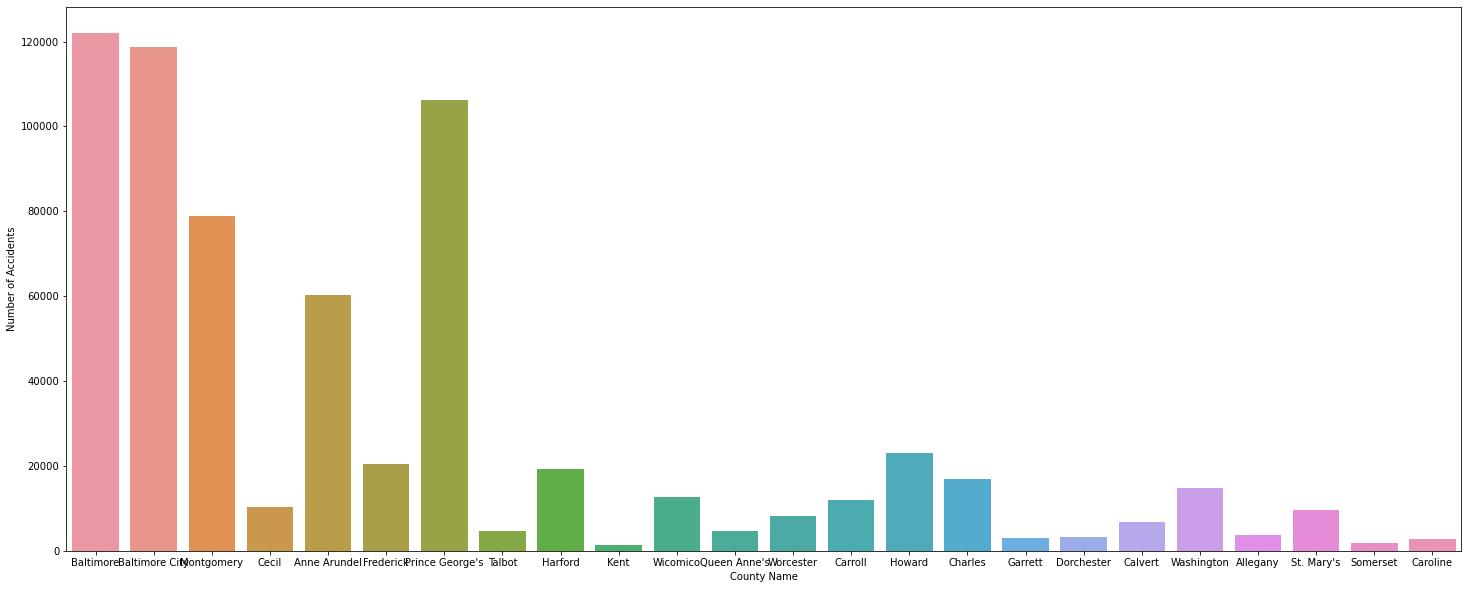

In [32]:
# The number of crashes that were recorded were 665555
# The number of vehicles involved in crashes were 1242403
print(crash_data.columns)
print(car_data.columns)

# creating a list from dict gets rid of duplicate county and year values from the dataset
counties = list(dict.fromkeys(crash_data['COUNTY_DESC']))
years = list(dict.fromkeys(crash_data['YEAR']))

# Create a county dict where the key is the county name and the value is the number of accidents that occurred in it
county = {}
for each_county in counties:
    county[each_county] = 0
    
for i in range(665555):
    county[crash_data['COUNTY_DESC'][i]] += 1

# Create the barplot of accident count per county
plt.figure(figsize = (25, 10))
plt.xlabel('County Name')
plt.ylabel('Number of Accidents')
sns.barplot(x = list(county.keys()), y = list(county.values()))
plt.show()

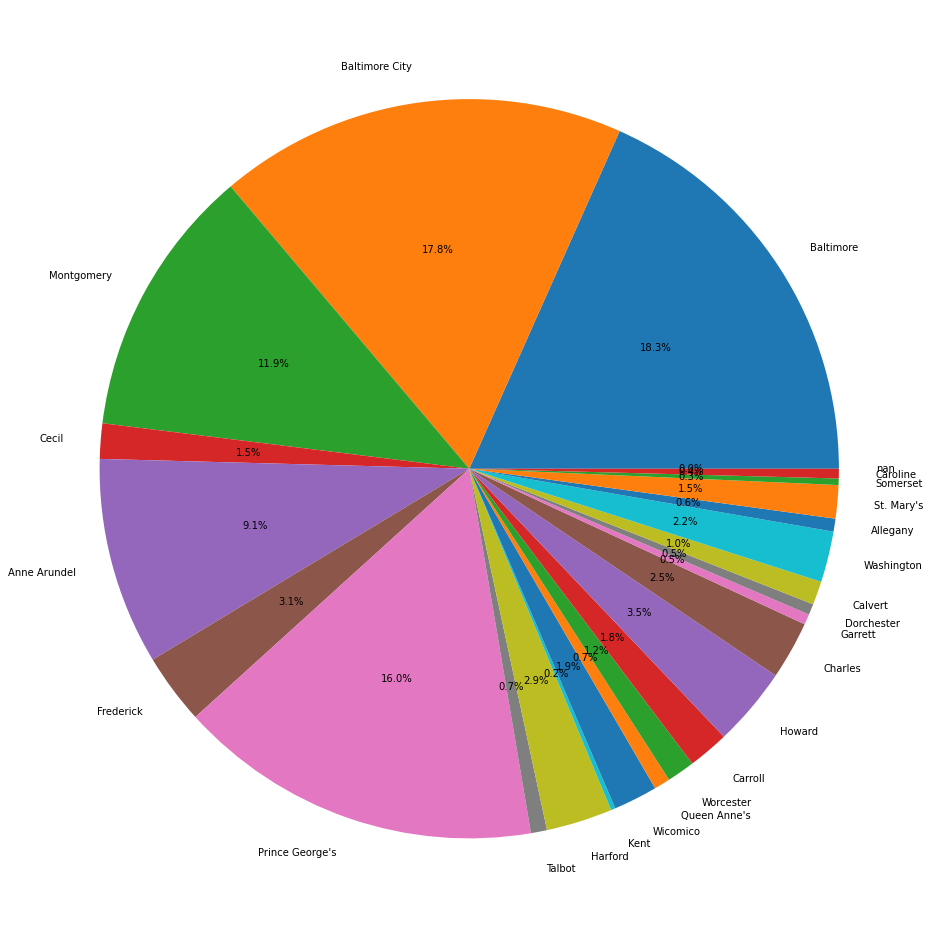

In [40]:
plt.figure(figsize=(17,17))
plt.pie(x = list(county.values()), labels = list(county.keys()), autopct='%1.1f%%')
plt.show()

Based on the data above, the number of accidents that occur are skewed towards the more central, populated counties. Baltimore, Baltimore City, Prince George's, and Montgomery County in and of themselves have 64% of the total accidents. Over a five year period, 665555 crashes have occurred

In [9]:
# This is a map centered around Maryland

map_osm = folium.Map(location = [39, -77], zoom_start = 8)
map_osm

In [10]:
latitude = crash_data.get('LATITUDE')
longitude = crash_data.get('LONGITUDE')

for i in range(500):
    r = random.randint(1, 665554)
    folium.Marker([latitude[r], 
                   longitude[r]]).add_to(map_osm)

map_osm

Based on the random sample of about 500 crashes. This is a solid sample size that eliminates much concerns about
statistical anomalies due to the law of large numbers, and it allows for the display of outliers. 

Based off of the map, there are multiple conclusions that we visibly discern.

There are two solid clusters where crashes occur in Maryland: around the jurisdiction of Washington D.C, and towards
the heart of Baltimore. Intuitively, this makes sense because Baltimore is a traffic heavy area with a high population
density, which are factors that tend to contribute towards car crashes. For the next cluster around Washington D.C., this
also makes sense because Maryland police do not report on issues that occur in D.C., so there should be no reports in D.C.
while there should be reports from all the crowded highways in Maryland that feed towards D.C., where more accidents 
should happen from compounding, funneling traffic. 

There are a few outliers that occur on state boundaries or even outside of the state, and this is quite surprising 
because the database title and intention heavily implies Maryland-bound crashes, but then there is the element where
if Maryland cars crash outside of state boundaries, that would get counted as an official crash report for the state
of Maryland because a resident was an instigator or victim of the crash. Most Maryland drivers drive within the state, 
so it makes sense that there would be very few crashes outside of the state, much less in other jurisdictions.

**

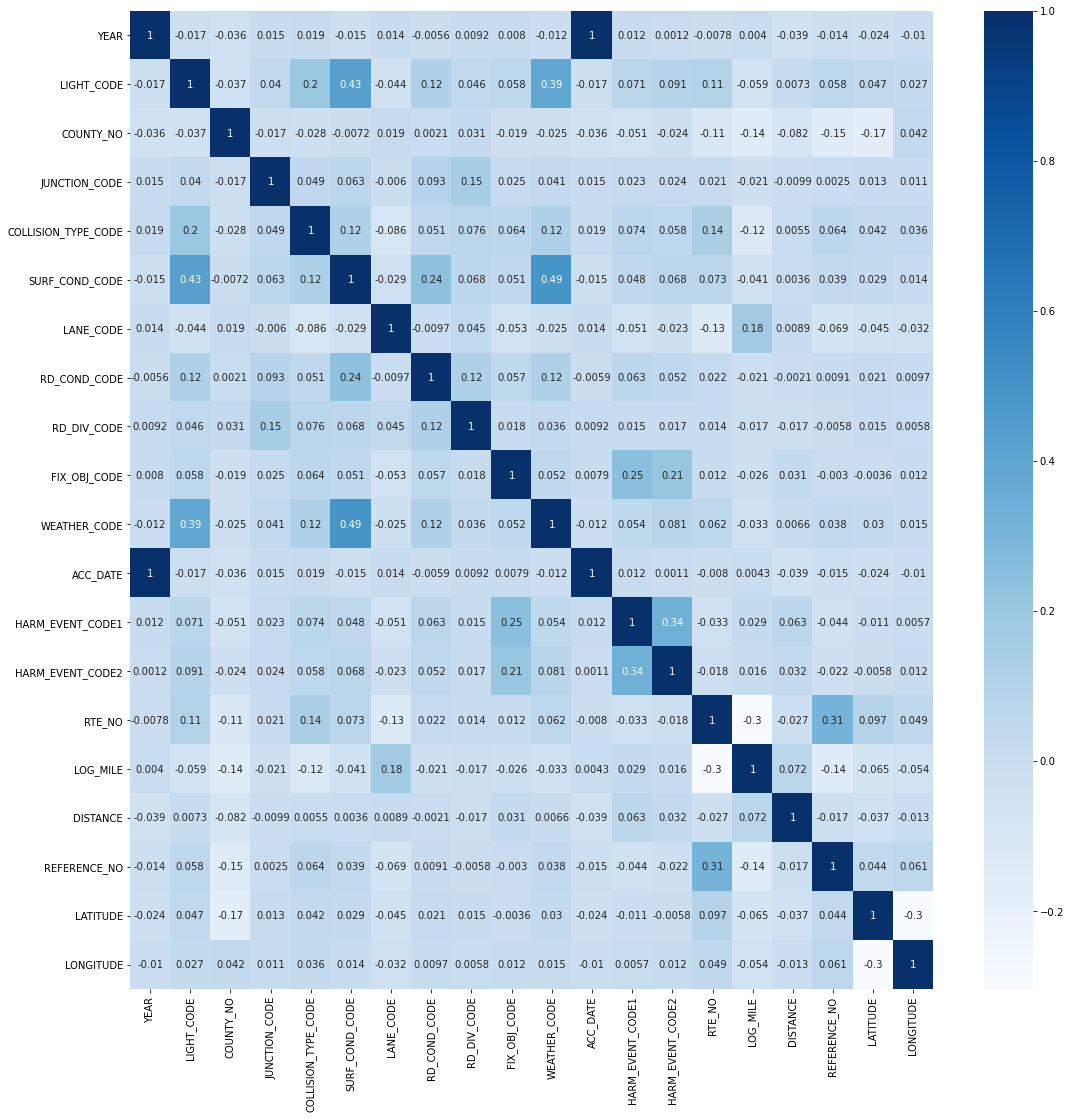

In [11]:
plt.figure(figsize=(18,18))
sns.heatmap(crash_data.corr(), annot=True, cmap='Blues')
plt.show()

This is a correlation index between different columns in the table. Of course, each column will have a completely direct 
correlation to itself, but there are some things worth noting

When it comes to damage, there is some correlation (highlighted in the second row) between it and what areas of the car 
are hit. For example, heavy damage is caused when the side of the car is hit, as it has little reinforcement, whereas more
controlled damage happens in the front or back end of the car. There is also heavy correlation (highlighted in the third
row) between the type of movement and the areas of the car that were destroyed, and some correlation between damage and
movement. This could help shape our predictive model to find out the severity of an accident. There is also some 
correlation between a car being towed versus damage AND movement in the 10th row. 

There is also a slight negative correlation between damage and vehicle year, which makes sense. Older models are built to lesser safety standards, so the damage in crashes should be more and vice versa. A decrease in model year leads to an increase 
in damage. The type of movement also has some correlation with respect to if a vehicle is towed and the area damaged. 
This lines with the intuition that movement of the car directly causes the accident.

The year that the accident happened also has almost no correlation with any of the features behind an accident such as
damage, speed limit, and area of the car damaged.

For the purposes of a predictive model for damage, it might be prudent to pick a few features that correlate nicely with
it compared to others, such as if it was towed, the areas of the car that were damaged, and the movement of the car.

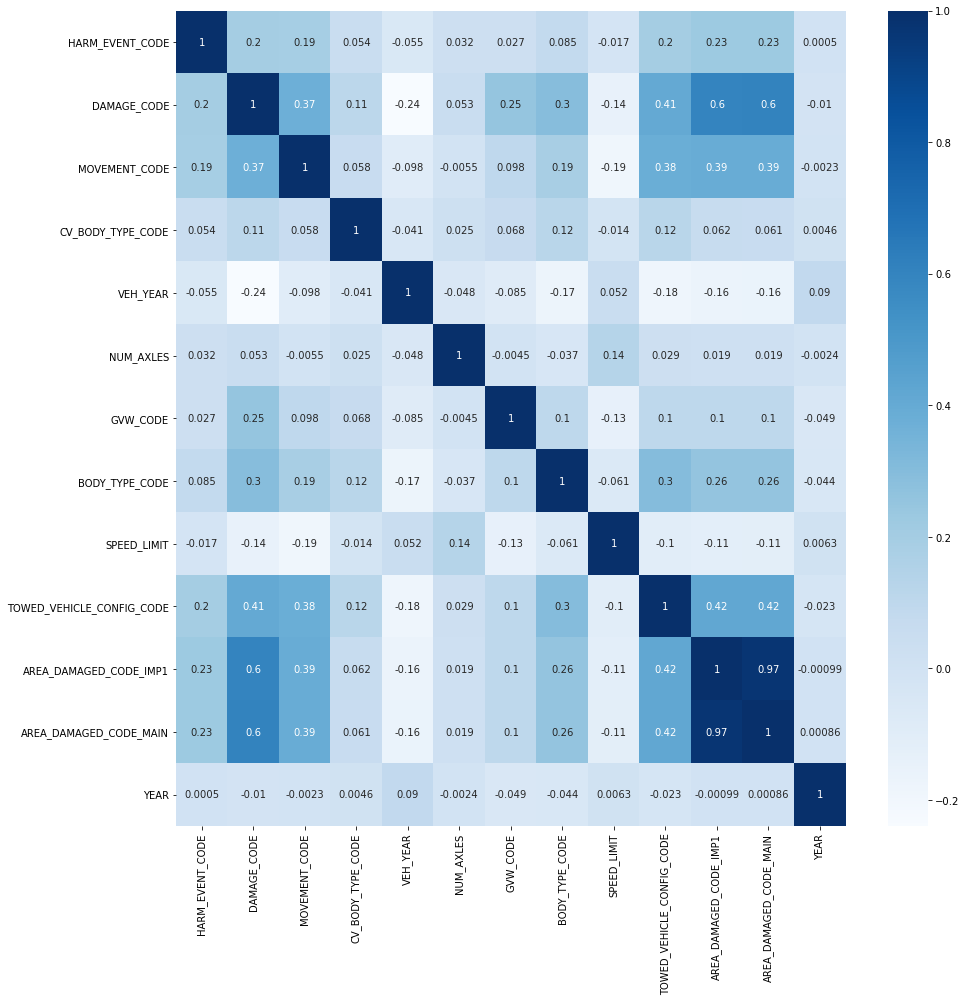

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(car_data.corr(), annot=True, cmap='Blues')
plt.show()

In [48]:
# Linear regression to try to predict the severity of a crash based on metrics 

In [49]:
# Conclusion

# We sought to do two things

In [50]:
car_data.columns

Index(['HARM_EVENT_DESC', 'HARM_EVENT_CODE', 'CONTI_DIRECTION_DESC',
       'CONTI_DIRECTION_CODE', 'DAMAGE_DESC', 'DAMAGE_CODE', 'MOVEMENT_DESC',
       'MOVEMENT_CODE', 'VIN_NO', 'REPORT_NO', 'CV_BODY_TYPE_DESC',
       'CV_BODY_TYPE_CODE', 'VEH_YEAR', 'VEH_MAKE', 'VEH_MODEL',
       'COMMERCIAL_FLAG', 'HZM_NUM', 'TOWED_AWAY_FLAG', 'NUM_AXLES',
       'GVW_DESC', 'GVW_CODE', 'GOING_DIRECTION_DESC', 'GOING_DIRECTION_CODE',
       'BODY_TYPE_DESC', 'BODY_TYPE_CODE', 'DRIVERLESS_FLAG', 'FIRE_FLAG',
       'PARKED_FLAG', 'SPEED_LIMIT', 'HIT_AND_RUN_FLAG', 'HAZMAT_SPILL_FLAG',
       'VEHICLE_ID', 'TOWED_VEHICLE_CONFIG_DESC', 'TOWED_VEHICLE_CONFIG_CODE',
       'AREA_DAMAGED_CODE_IMP1', 'AREA_DAMAGED_CODE1', 'AREA_DAMAGED_CODE2',
       'AREA_DAMAGED_CODE3', 'AREA_DAMAGED_CODE_MAIN_DESC',
       'AREA_DAMAGED_CODE_MAIN', 'YEAR', 'Quarter'],
      dtype='object')

In [ ]:
# Independent variables for predicting the severity of a crash are 
# 1. vehicle towed code
# 2. area of the car damaged
# 3. movement of the car
# 4. vehicle year 

# Dependent variable for the severity of a crash is: damage-code translated into damage description